### 회귀분석

#### 1. 회귀분석(Regression)이란? 

* 모든 분석의 기본이 될 정도로 중요한 분석방법
* 독립변수(X)와 종속변수(Y)의 관계식을 구하는 기법 : 독립변수가 한 단위가 증가/감소할 때 종속변수가 얼마나 영향을 받는지를 분석하는 방법 예를 들어 광고비(독립변수)가 증가할 때 매출액(종속변수)의 증가 추이분석
 
#### 2. 회귀분석의 종류

1. 단순회귀분석 : 독립변수가 1개인 회귀모형
 - 광고집행비(X)를 이용하여 해당 기업의 매출액(Y)를 예측하는 모형
 
2. 중회귀분석 : 독립변수가 2개 이상인 회귀모형
 - 학생의 나이(X1)와 하루 평균학습시간(X2)를 이용하여 학생의 성적(Y)을 예측하는 모형

#### 3. 분석방법론

      기법              대상변수A     대상변수B   적용예
      ================================================================================================      
      카이제곱검정      이산형        이산형      성별과 구매여부사이에 유의한 관계가 있는가?
      
      독립표본 t검정    이산형        연속형      체중과 구매여부사이에 유의한 관계가 있는가?
                        (2그룹)                   (구매자와 비구매자의 평균체중이 다른가?)
      
      대응표본 t검정    이산형        연속형      보충수업후 성적향상이 있는가?
                        (2그룹/Pair) 
      
      일원배치          이산형        연속형      거주지역에 따른 평균소득의 차이가 있는가? 
      분산분석          (3그룹이상)
      
      회귀분석          연속형        연속형      가계수입과 사교육비 지출상이에 유의한 관계
                                                  가 있는가?


In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

#### 선형모델

##### 1. 선형회귀모델

회귀를 위한 선형모델은 특성이 하나일 때는 직선으로 나타나고 2개일 때는 평면이 되며 더 높은 차원(특성이 더 많음)에서는 초평면(Hyperplane)이 되는 회귀모델의 특징을 가지고 있다.

w[0]: 0.393906  b: -0.031804


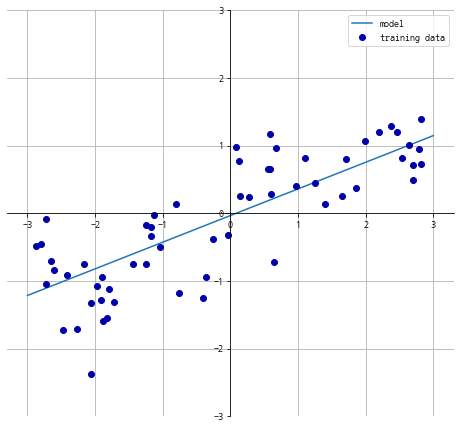

In [3]:
# y = wx + b
import mglearn # pip install mglearn
mglearn.plots.plot_linear_regression_wave() # 1차원데이터셋인 wave

##### 2. 선형회귀(최소제곱법)

선형회귀(Linear Regression) 또는 최소제곱법(OLS Old Least Squares)은 가장 간단하고 오래된 회귀용 선형알고리즘이다. 선형회귀는 예측과 훈련세트에 있어 타깃(종속변수, y_-)사이의 `평균제곱오차 (Mean Square Error)`를 최소화하는 파라미터 `w(기울기 slope, 가중치 weight)`와 `b(편향(bias), 절편, intercept)`를 구한다. `평균제곱오차`는 예측값과 타깃갑의 차이를 제곱하여 더한후에 샘플의 갯수로 나눈 것이다.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

# make_wave : 회귀분석에 사용할 임의의 데이터(연속성데이터)
X, y = mglearn.datasets.make_wave(n_samples=60)

# 훈련용과 검증용데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 머신러닝
lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

# 기울기 파리미터(w)는 가중치 weight 또는 계수 coefficience라고 하며 coef_속성에 저장되고
# 편향 offset 또는 절편 intercept파라미터(b, bias)는 intercept_속성에 저장되어 있다.
# intercept속성은 항상 하나의 실수값이지만 coef_속성은 입력특성(값)에 하나씩 대응되는
# numpy배열이다. wave데이터셋은 입력특성이 하나이기 때문에 coef_속성도 한개의 값만 가지고 있다.

# 뒤의 밑줄(언더바)은 scikit_learn에서 훈련데이터에서 유도된 속성으로서 항상 끝에 밑줄을
# 붙이는데 그 이유는 사용자가 지정한 매개변수와 구분하기 위해서 이다.

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [52]:
# 결과분석
print("훈련세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# R2값이 0.66인 것은 그리 좋지 않은 결과이다. 하지만 훈련용과 매우 비슷한 것을 알 수 있다.
# 그래서 이 모형은 과소적합상태를 의미한다.

훈련세트 점수: 0.67
검증세트 점수: 0.66


In [55]:
# 1차원 데이터셋에서는 모델이 단순하기 때문에 과대적합을 걱정할 필요가 없지만
# 특성이 많은 데이터셋에서는 선형모델의 성능이 매우 높하져서 과대적합이 될 가능성이
# 매우 높다. 특성이 많은 보스톤주택가격데이터셋은 506개의 샘플에서 104개의 특성이 있다.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# 결과분석
# 훈련세트와 검증세트의 점수를 비교해 보면 훈련세트의 예측은 매우 정확한 반면에
# 검증세트는 R2값이 매우 낮다(61%). 이런 성능차이는 모델이 과대적합이 되었다는 
# 의미이기 때무에 이런 복잡한 특성치를 제어할 수 있는 모델을 사용해야 하는데 
# 기본 선형회귀방식대신 가장 널리 사용되는 모델은 릿지회귀이다.

훈련세트 점수: 0.95
검증세트 점수: 0.61


##### 3. 릿지회귀(Ridge)

`릿지회귀`도 회귀를 위한 선형모델이므로 최소적합법에서 사용한 것과 같은 예측함수를 사용한다. 
하지만 릿지회귀에서의 가중치(w)선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약조건을 만족시키는 목적도 있다. 즉, w의 모든 원소가 0에 가깝게 되도록, 모든 특성이 출력에 주는 영향을 최소한으로 만든다(즉, 기울기를 작게한다) 이런 제약을 규제(Regularization)이라고 한다. 규제란? 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.
릿지회귀에 사용하는 규제방식을 `L2규제`라고 한다.

In [58]:
# LR의 과대적합화 최소화 하기
# ... 가중치(w)선택은 최대한 적게 만든다. 즉, 기울기를 작게 만든다.
# ... 과적합를 개선하기 위해 릿지회귀분석을 실행해서 성과를 높인다.
# ... 미래예측 64%의 검증을 좀 더 높이기 위해서 수행
# 릿지회귀는 LR보다 과적합화가 적게 나타난다.
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)

print("훈련세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))
print(ridge)

# 결과분석
# 훈련세트에서 LR보다는 점수가 낮지만 감증세트의 점수는 높다. 즉, 과대적합이 발생할
# 가능성이 적어진다.

훈련세트 점수: 0.89
검증세트 점수: 0.75
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [61]:
# 알파값(Reqularization Strength: 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미)을
# 조정해서 테스트(알파값을 처음에는 10으로 실행하고 0.1일때랑 비교분석)
# 릿지회귀에서 알파값의 기본값은 1.0
# 알파값을 높이면 예측율이 낮아지고 낮추면 예측율이 올라간다. 
# 즉, 알파값을 줄이면 제약이 풀린다.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
print()

ridge05 = Ridge(alpha=5).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(ridge05.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(ridge05.score(X_test, y_test)))
print()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# 결과분석
# 예측율만 보면 0.1에서 좋은 성능을 나타내는 것을 볼 수가 있다.
# 좋은 매개변수를 선택하는 방법은 시행착오를 거쳐야 한다.

훈련세트 점수: 0.79
검증세트 점수: 0.64

훈련세트 점수: 0.82
검증세트 점수: 0.68

훈련세트 점수: 0.93
검증세트 점수: 0.77



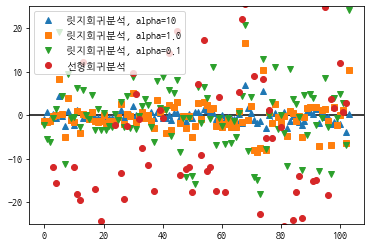

In [65]:
# coef_의 값을 기준으로 시각화
plt.plot(ridge10.coef_, '^', label='릿지회귀분석, alpha=10')
plt.plot(ridge.coef_, 's', label='릿지회귀분석, alpha=1.0')
plt.plot(ridge01.coef_, 'v', label='릿지회귀분석, alpha=0.1')
plt.plot(lr.coef_, 'o', label='선형회귀분석')

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

# 결과분석
# x축은 coef_의 값을 위치대로 나열한 것 즉, x=0은 첫번째특성에 연관된 계수이고
# x=104는 104번째 특성에 연관된 계수이다.
# y축은 각 계수의 수치를 나타낸다. alpha=10일때 -3~3사이에 위치하고
# alpha=1일때 모델의 계수는 좀더 커졌고 0.1일 경우일 때눈 더 커졌다.
# 아무런 제약이 없는 alpha=0일 때는 그림 범위밖으로 넘어갈 것이다.

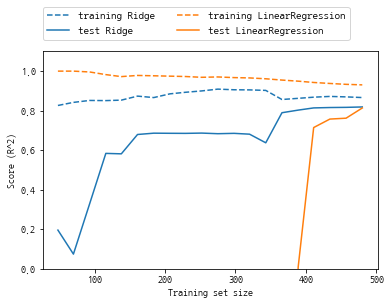

In [66]:
# 규제를 이해하는 또 다른 방법은 alpha값을 고정하고 훈련데이터크기를 변화시켜 보는 것이다.
# plot_ridge_n_samples() 보스턴데이터셋에서 여러가지의 데이터크기로 샘플링해서 LR과 Ridge
# (alpha=1)을 적용한 그래프이다.
# 데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프 즉 학습곡선(Learning Curve)이라고 한다.
mglearn.plots.plot_ridge_n_samples()

# 결과분석
# LR, Ridge모두 훈련용셋의 점수가 높다. Ridge에는 규제가 적용되기 때문에 LR보다 점수가
# 낮지만 검증데이터셋에서는 Ridge점수가 더 높은 것을 알 수가 있다.
# 특히 데이터셋의 크기가 400미만에서는 LR은 학습이 되지 않고 있는 것을 볼 수가 있다.
# 결론적으로 두 모델의 성능은 데이타셋이 많을 수록 좋아진다. 이 의미는 데이터가 많아질 
# 수록 과대적합이 어려워지는 것을 알 수 있다.

##### 4. 라쏘회귀(Lasso)

선형회귀에 규제를 적용하는 데 Ridge의 대안으로 `Lasso`가 있다. Lasso도 릿지처럼 계수를 0에 가깝게 만들려고 하지만 방식이 조금 다르면 이를 ` L1규제`라고 한다. L1규제결과로 Lasso를 사용 할 때 어떤 계수는 정말로 0이 된다. 이 의미는 모델에서 완전히 제외되는 특성이 생긴다는 것이다.

In [67]:
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)

print("훈련세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("Lasso분석에서 사용된 특성의 갯수 : {}".format(np.sum(lasso.coef_ != 0)))
print(lasso)

# 결과분석
# 훈련, 검증세트 모두에서 결과가 좋지않다. 즉, 과소적합이 발생했다.
# 104개의 특성중에서 Lasso분석은 4개의 특성만 사용한 것을 볼 수가 있다.

훈련세트 점수: 0.29
검증세트 점수: 0.21
Lasso분석에서 사용된 특성의 갯수 : 4
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [70]:
# 과소적합을 줄이기 위해 alpha값을 줄여 보기. alpha값을 줄이기 위해서 max_iter(반복 
# 실행하는 최대 횟수)의 기본값을 늘여야 한다.
# "max_iter" 기본값을 증가시키지않으면 기본값을 늘이라는 경고가 발생한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Lasso분석에서 사용된 특성의 갯수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련세트 점수: 0.90
검증세트 점수: 0.77
Lasso분석에서 사용된 특성의 갯수 : 33


In [71]:
# alpha값을 너무 낮게 하면 규제의 효과가 없어져서 과대적합이 되기 때문에 LR과 결과가
# 비슷해 진다.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Lasso분석에서 사용된 특성의 갯수 : {}".format(np.sum(lasso00001.coef_ != 0)))

훈련세트 점수: 0.95
검증세트 점수: 0.64
Lasso분석에서 사용된 특성의 갯수 : 96


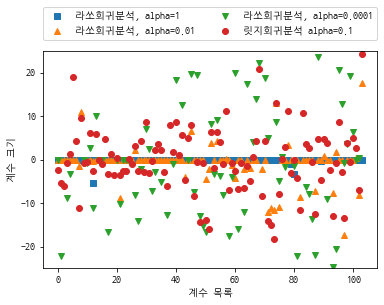

In [72]:
# Lasso분석결과의 시각화

plt.plot(lasso.coef_, 's', label='라쏘회귀분석, alpha=1')
plt.plot(lasso001.coef_, '^', label='라쏘회귀분석, alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='라쏘회귀분석, alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='릿지회귀분석 alpha=0.1')

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()

# 결과분석
# alpha=1 일때 대분분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는 것을 알수가 있다.
# alpha=0.01로 줄이면 대부분의 특성이 0이 되는(정삼각형)분포를 얻게 되며 0.0001이 되면
# 계수 대부분이 0이 아니고 값도 커져서 규제를 받지 않는 모델이 된다. 
# Ridge alph1=0.1인 릿지모델과 비교해 보면 두 모델중 보통은 릿지를 선호하지만 특성이 
# 많고 그 중 일부분만 중요한 특성이라면 Lasso가 더 좋은 선택일 수가 있다.

### 회귀분석실습

In [4]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_regression

#### 1. 전기소비량 예측

회귀분석 : 전기생산량과 소비량을 예측

In [19]:
# 귀무가설 : 전기생산량과 소비량간의 상관관계가 없다.
# 대립가설 : 전기생산량과 소비량간의 상관관계가 있다.

# 월별 전기생산량(단위: 억원)
x = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
# 월별 전기사용량(단위: 백만Kwh)
y = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

# 기울기(slope), 절편(intercept), 상관계수(rvalue, -1~1사이의 값)
# pvalue(예측불확실의 정도의 값)
# pvalue는 0.05이하일때 통계살적으로 95%신뢰수준하에 유의하다.

# 선형회귀분석 : stats.linregress(x, y)
result = stats.linregress(x, y)
print(type(result))
result

# 결과분석
# pvalue = 9.238421943157891e-05 <0.05보다 작으므로 95%, 99%신뢰수준하에 유의하다.
# rvalue=0.89..는 89%만큼의 설명력이 있다.
# 즉 귀무가설을 기각하고 대립가설을 채택한다.

<class 'scipy.stats._stats_mstats_common.LinregressResult'>


LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

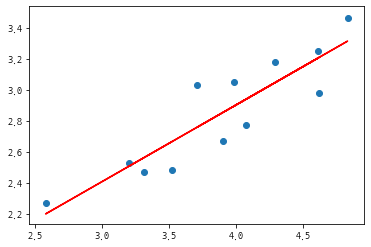

In [22]:
# 선형회귀분석 시각화
slope, intercept, rvalue, pvalue, stderr = result # 또는 stats.linregress(x, y)

# 회귀선
# 산점도
plt.scatter(x, y)

# y = slope * x + intercept : y = ax + b
# 독립변수 리스트(X)를 np.array로 변환
x1 = np.array(x, dtype=np.float64) 
plt.plot(x1, slope * x1 + intercept, c='red')
plt.show()

# 결과분석
# 예측소비량 = 기울기 * 전기생산량 + intercept

In [24]:
# 전기소비량을 예측
f = 5
slope * f + intercept

3.3975976081603942

#### 2. 온도와 오존과의 상관관계

In [27]:
# 귀무가설 : 온도가 오존량에 영향이 없다.
# 대립가설 : 온도가 오존량에 영향이 있다.
df = pd.read_csv('../data/ml/ozone/ozone.csv')
display(df.tail())
display(df.info())

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


None

In [32]:
# 결측값 행제거
df.isna().sum()
df2 = df.dropna(axis=0)
df2.isna().sum()
df2.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


In [34]:
# 선형회귀분석모델
# 기울기(slope), 절편(intercept), 상관계수(rvalue), pvalue(예측 불확실성의 정도의 값)
# 에러의 표준편차(stderr)
x = df2['Temp'].values  # 독립변수
y = df2['Ozone'].values # 종속변수
print(x)
print(y)

result = stats.linregress(x, y)
result

# 결과분석
# 모델의 적합도 : 69%의 설명력이 있다.
# 95,99%신뢰수준하에 유의하다
# 귀무가설을 기각하고 대립가설을 채택
# 즉, 온도가 오존량에 영향을 미친다.

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174)

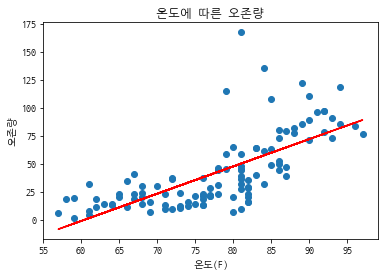

In [38]:
# 결과 시각화
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
x1 = np.array(x)
plt.scatter(x,y)
plt.plot(x1, slope * x1 + intercept, c='red')
plt.xlabel("온도(F)")
plt.ylabel("오존량")
plt.title("온도에 따른 오존량")
plt.show()

In [39]:
# 모델예측
# 온도가 화씨 80도일 때 오존량은?
f = 80
print("화씨 80도 일때 오존의 예측량 :", slope * f + intercept )

화씨 80도 일때 오존의 예측량 : 47.48272006175401


#### 3. 보스톤의 주택가격 예측

회귀분석의 한 예로 scikit-learn 패키지에서 제공하는 주택가격을 예측하는 문제를 보였다. 이 문제는 범죄율, 공기 오염도 등의 주거 환경 정보 등을 사용하여 70년대 미국 보스턴시의 주택가격을 예측하는 문제이다.

scikit-learn이 제공하는 회귀 분석용 예제 데이터 중 하나인 보스턴 주택 가격 데이터에 대해 소개한다. 이 데이터는 다음과 같이 구성되어 있다.

* 타겟 데이터
 - 1978 보스턴 주택 가격
 - 506 타운의 주택 가격 중앙값 (단위 1,000 달러)
 
* 특징 데이터
 - CRIM 자치시(town) 별 1인당 범죄율  
 - ZN 25,000 평방피트를 초과하는 거주지역의 비율  
 - INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
 - CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
 - NOX 10ppm 당 농축 일산화질소  
 - RM 주택 1가구당 평균 방의 개수  
 - AGE 1940년 이전에 건축된 소유주택의 비율  
 - DIS 5개의 보스턴 직업센터까지의 접근성 지수  
 - RAD 방사형 도로까지의 접근성 지수  
 - TAX 10,000 달러 당 재산세율  
 - PTRATIO 자치시(town)별 학생/교사 비율  
 - B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
 - LSTAT 모집단의 하위계층의 비율(%)  
 - MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)   
 
* load_boston() 명령으로 로드하고 DESCR 속성으로 문서 설명을 볼 수 있다.

In [80]:
import mglearn
from sklearn.datasets import load_boston # sklearn에 내장된 데이터셋
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = load_boston()
print("데이터의 형태 : {}".format(boston.data.shape))
print(boston.DESCR)

데이터의 형태 : (506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
 

In [84]:
#print(boston)
# 데이터는 딕셔너리형태로 되어있기 때문에 후속작업을 위해 pandas의 데이터프레임형태로 변환
# 독립변수인 특성행렬을 dfX로 종속변수인 target을 벡터로 dfy로 생성
# statmodels에서 작업을 하려면 독립변수와 종속변수를 하나의 df으로 만드는 것이 편리하기 때
# 문에 concat명령을 사용하여 df이라는 하나의 데이터프레임으로 생성한다.
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


###### 데이터전처리

데이터프레임을 생성한 후에는 데이터에 대한 사전조사를 해서 데이터 전처리작업을 진행해야 한다. 전처리를 하려면 아래와 같은 점에 유의한다.

* 데이터에 누락된 값이 있는지 확인
* 각 데이터가 연속적인 실수값인지 범주형 값인지 확인
* 실수형 데이터의 분포가 정규 분포인지 확인
* 실수형 데이터에 양수 혹은 범위 등으로 제한 조건이 있는지 확인
* 범주형 데이터의 경우 범주의 값이 어떤 값 혹은 숫자로 표현되어 있는지 확인
* 데이터간의 상관관계를 확인
* 데이터에 이상한 값(outlier)들이 있는지 확인

보스턴 데이터의 경우 0과 1로 표현된 CHAS 데이터를 제외하고는 가격을 포함한 대부분의 데이터가 양수인 실수이다. seaborn의 pairplot 명령으로 각 데이터의 분포와 데이터들간의 상관관계를 파악한다. 다음 그림에는 일부 데이터만을 보였으나 이 그림만으로도 가격(MEDV)과 RM 데이터가 강한 양의 상관관계를 가지는 것을 볼 수 있다. 또한 스캐터플롯상으로 볼 때는 AGE나 RAD 데이터는 가격과 음의 상관관계를 가지는 것처럼 보인다. 실제로 이러한 관계가 있는지 이후의 분석과정에서 더 자세히 알아본다.

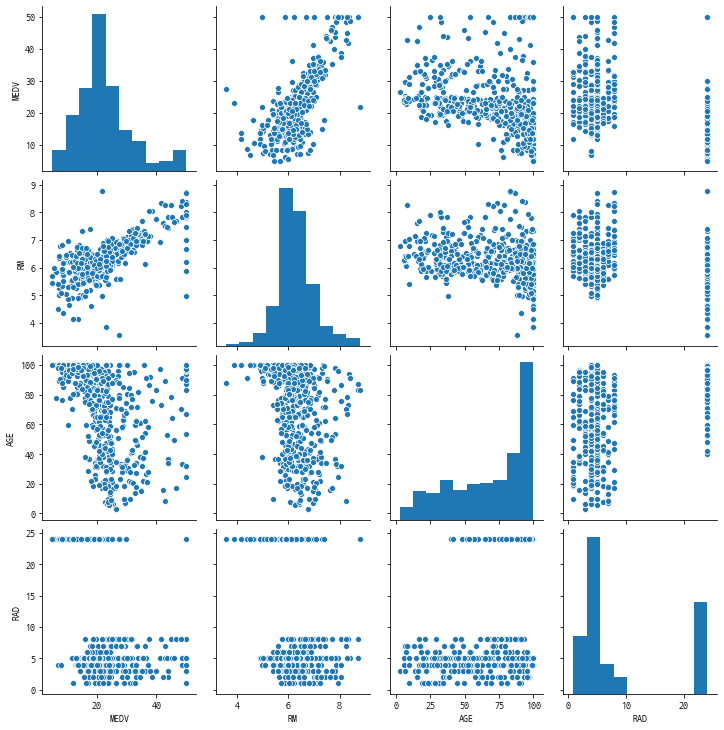

In [86]:
# 각 특성들의 상관관계에 대한 시각화
import seaborn as sns
cols = ["MEDV", "RM", "AGE", "RAD"]
sns.pairplot(df[cols])
plt.show()

In [88]:
df[cols].head()

,MEDV,RM,AGE,RAD
0,24.0,6.575,65.2,1.0
1,21.6,6.421,78.9,2.0
2,34.7,7.185,61.1,2.0
3,33.4,6.998,45.8,3.0
4,36.2,7.147,54.2,3.0


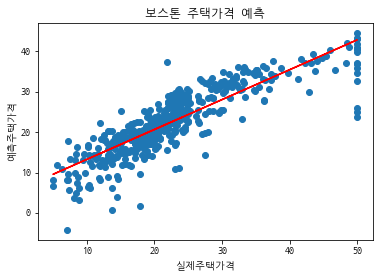

In [95]:
# 보스톤 주택가격에 대한 문제를 회귀분석하기

model = LinearRegression().fit(boston.data, boston.target) # 13개의 특성을 가지고 머신러닝
predicted = model.predict(boston.data) # 훈련된 모델을 가지고 13개의 특성치로 가격을 예측
#predicted
plt.scatter(boston.target, predicted)
plt.xlabel("실제주택가격")
plt.ylabel("예측주택가격")
plt.title("보스톤 주택가격 예측")
# plt.show()

from scipy import stats
result = stats.linregress(boston.target, predicted)
slope, intercept, r_value, p_value, stderr = result # or stats.linregress(boston.target, predicted)
x1 = np.array(boston.target)
plt.plot(x1, slope*x1+intercept, c="red")
plt.show()

# 결과분석
# 결과그래프에서 하나의 점은 하나의 데이터를 의미한다. 점의 가로축은 실제주택가격을 나타내고
# 세로축의 값은 회귀분석한 결과에 따른 예측주택가격이다.
# 만약, 회귀분석방법으로 가격을 정확하게 100%예측했다면 결과는 기울기가 1인 직선과 같은 형
# 태가 되어야 하지만 실제로는 타원형으로 되는 경우가 많다.

In [101]:
# 과적합도를 예방하기 위하여 데이터셋을 훈련용과 검증용으로 분리
# 훈련용데이타셋 : 검증용데이터셋 = 7 : 3
# 기계학습에 필요한 훈련용과 검증용은 보통 8:2 또는 7:3으로 나눈다. 기본 75:25

# random_state : 난수 발생을 위한 seed의 인자값
# test_size 30%는 검증용 데이터셋
X_train, X_test, y_train, y_test = \
    train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

In [107]:
print(X_train.shape) # 504 * 70% = 354건
print(X_test.shape) # 504 * 30% = 152건

#  fit() : 머신러닝 즉, 데이터를 가지고 학습시키는 기능
# 회귀분석 모델에 데이터를 입력하여 기계학습을 실시
lr = LinearRegression().fit(X_train, y_train) 
print(lr)

(354, 13)
(152, 13)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [103]:
# 훈련용데이터셋의 점수
print(lr.score(X_train, y_train)) # 70%의 과거예측은 95%이상 예측
# 검증용데이터셋의 점수
print(lr.score(X_test, y_test)) # 30%의 미래예측은 64%이상 예측
print()
print('훈련세트점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('시험세트점수: {:.2f}'.format(lr.score(X_test, y_test)))
# 훈련용세트의 점수는 좋지만 테스트세트에 대해서는 낮다. 즉 과적합화(Overfitting)되었다는 것

0.7645451026942549
0.6733825506400194

훈련세트점수: 0.76
시험세트점수: 0.67


In [112]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train) 
print('훈련세트점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('시험세트점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련세트점수: 0.76
시험세트점수: 0.67


In [122]:
lasso = Lasso(alpha=1.0, max_iter=100000).fit(X_train, y_train) 
print('훈련세트점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('시험세트점수: {:.2f}'.format(lasso.score(X_test, y_test)))

훈련세트점수: 0.71
시험세트점수: 0.61


### $$Generalization, Overfitting, and Underfitting$$

<img src="./images/28.머신러닝_regression_1.png" width="500" height="400">

### 분류선형모델

회귀분석은 종속변수가 연속형인 경우 살펴보았으나 종속변수가 이산형일경우에 사용되는 회귀분석방법이 `지스틱회귀분석(Logistic Regression)` 이다. 로지스틱회귀분석에서는 `종속변수의 값은 0, 1`로 입력된다.

가장 널리 알려진 두개의 선형분류 알고리즘이 있다. 

>1. 로지스틱회귀분석(Logistic Regression) : 로지스틱은 회귀알고리즘이 아니라 분류알고리즘
2. 서포트벡터머신 :(Suppoert Vector Machine) : 

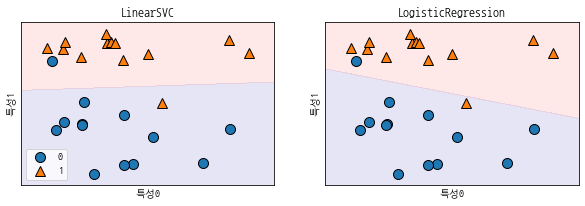

In [18]:
# forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 실습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.1)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")    
    ax.set_ylabel("특성1")
axes[0].legend()
plt.show()

# 결과분석
# 두 모델에서 결정경계가 직선으로 표현되었고 상단은 1, 하단은 0으로 분류
# 즉, 새로운 데이터가 경계선의 상단 또는 하단에 위치함에 따라 분류가 된다.
# 그리고 두 모델 모두 특성2개를 잘못 분류했는데 Ridge와 마찬가지로 두 모델은
# 기본적은 L2규제를 사용한다.
# 두 모델의 규제강도를 결정하는 매개변수는 "C"이다. C값이 높아지면 규제가 감소한다.
# 다시말해서 높은 C값을 지정하면 두 모델은 훈련세트에 가능한 최대로 맞추려고 하고
# 반대의 경우 모델은 계수 벡터(w)가 0에 가까워지도록 한다.

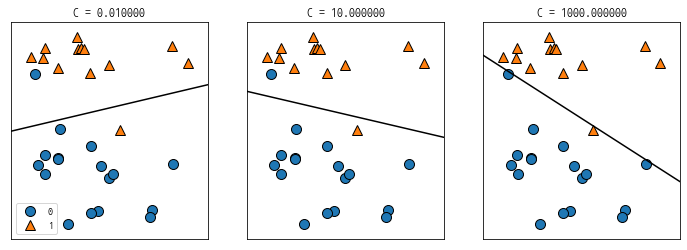

In [19]:
# C값 조정하기
mglearn.plots.plot_linear_svc_regularization()

###### 실습 : 유방암데이터셋

* load_breast_cancer데이터셋은 분류모델을 실습하기 위한 데이터셋이다.

In [26]:
# 유방암데이셋을 통해 LogisticRegression을 자세히 실습하기
from sklearn import datasets
from sklearn.model_selection import train_test_split
cancer = datasets.load_breast_cancer()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=42)

# LogisticRegression(C=1) : C의 기본값은 1
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련세트점수: {:.2f}'.format(logreg.score(X_train, y_train)))
print('검증세트점수: {:.2f}'.format(logreg.score(X_test, y_test)))

# 결과분석
# 두 세트의 성능이 매우 높게 예측되었기 때문에 과대적합화가 발생한 것 같다.

훈련세트점수: 0.94
검증세트점수: 0.97


In [40]:
# C값을 좀 더 증가시켜서 실습
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련세트점수: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('검증세트점수: {:.2f}'.format(logreg100.score(X_test, y_test)))
print()

logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print('훈련세트점수: {:.2f}'.format(logreg001.score(X_train, y_train)))
print('검증세트점수: {:.2f}'.format(logreg001.score(X_test, y_test)))

훈련세트점수: 0.95
검증세트점수: 0.96

훈련세트점수: 0.95
검증세트점수: 0.94


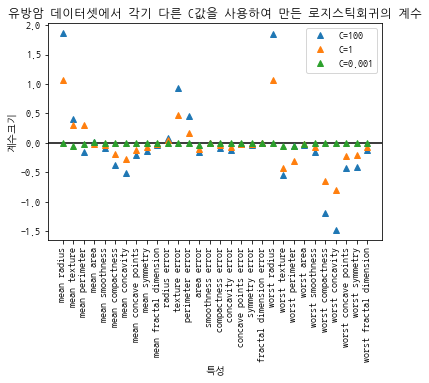

In [42]:
# 규제를 다르게 적용한 모델의 시각화
# 유방암데이터셋에서 각기 다른 C값을 사용하여 실습하기
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, '^', label="C=1")
plt.plot(logreg001.coef_.T, '^', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수크기")
plt.legend()
plt.title("유방암 데이터셋에서 각기 다른 C값을 사용하여 만든 로지스틱회귀의 계수")
plt.show()

###### 다중 클래스분류를 위한 선형모델

LogisticRegression을 제외하고 대부분의 선형분류모델은 이진분류만 지원한다.

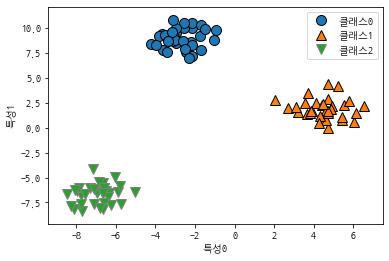

In [44]:
# 다중분류를 위한 실습 데이터셋 make_blobs를 사용하여 실습
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0", "클래스1", "클래스2"])
plt.show()

In [46]:
# make_blobs데이터셋으로 LinearSVC분류기로 훈련
linear_svm = LinearSVC().fit(X, y)
print("계수의 갯수", linear_svm.coef_.shape)
print("절편의 갯수", linear_svm.intercept_.shape)

계수의 갯수 (3, 2)
절편의 갯수 (3,)


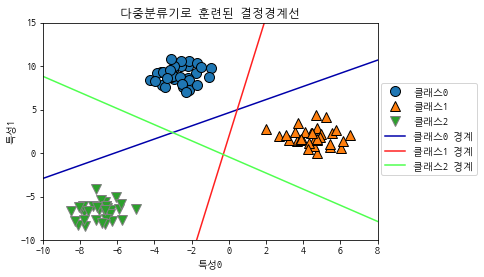

In [60]:
# 세개의 이진 분류기가 만든 경계의 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0", "클래스1", "클래스2", 
            "클래스0 경계", "클래스1 경계", "클래스2 경계"], loc=(1.01, 0.3))
plt.title("다중분류기로 훈련된 결정경계선")
plt.show()

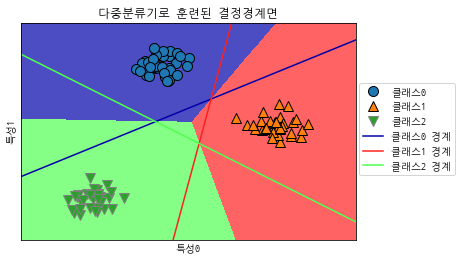

In [68]:
# 상기모델의 문제점은 중앙의 삼각형영역은 세가지 분류기가 모두 분류했다. 만약에 이곳의
# 데이터가 위치한 다면 어디로 분류가 될 것인가>
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["클래스0", "클래스1", "클래스2", 
            "클래스0 경계", "클래스1 경계", "클래스2 경계"], loc=(1.01, 0.3))
plt.title("다중분류기로 훈련된 결정경계면")
plt.show()

# 결과분석
# 분류의 예측율이 가장 높은 클래스 즉, 가장 가까운 면에 있는 클래스가 해당 면에 위치한
# 클래스로 분류가 된다.

### 로지스틱 회귀분석 실습

1. LOGIT(Logistic Regression)의 기본배경

>* 분류를 하는데 있어서 가장 흔한경우는 이분법을 기준으로 분류하는 경우 이다.
 - 예) 특정고객이 물건을 구매할것 인가?(1), 구매하지 않을 것인가?(0)
 -     특정기업이 부도가 날것 인지(0), 부도가 나지 않을 것 인지(1)
* 이항확률을 가진 종속변수를 통계적으로 설명하고자 할 경우에는 일반적인 회귀분석으로 적용하기에는 어려움이 있다.
* 로직스틱회귀분석은 값이 연속적인 값을 가지더라도 로지스틱함수의 결과값은 0과 1사이의 값을 갖도록 설계되어 있기 때문에 이분법적인 분류문제를 해결하는 모형으로 적합하다.

2. LOGIT의 적용분야

>* 기업부도예측
* 주가/환율/금리등의 up-down예측


##### 1. 부도기업과 건전기업 분류

X.shape: (26, 2)


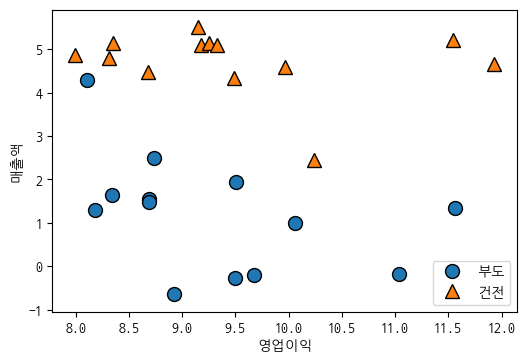

In [79]:
# 예를 즐어 부도 또는 건전기업을 이분법으로 분류
X, y = mglearn.datasets.make_forge()
#print(X); print(y)

# 데이터의 형태(26개의 데이터와 특성2개)
print('X.shape: {}'.format(X.shape))

# 산점도그리기
plt.rcParams['figure.dpi'] = 100 # 그래프의 해상도를 설정
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["부도", "건전"], loc=4)
plt.xlabel("영업이익")
plt.ylabel("매출액")
plt.show()

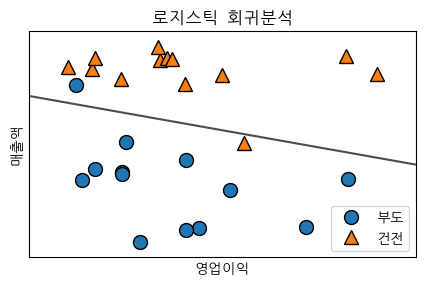

In [81]:
# 분류용 선형모델(LogisticRegression)
fig, axes = plt.subplots(1,1,figsize=(5,3)) # 1행1열 즉, 1개의 그래프

# 로지스틱회귀분석모델을 생성
model = LogisticRegression() # 규제 C=1.0이 기본값

# 모델을 기계학습(머신러닝)을 시킴
clf = model.fit(X, y);

# 기계학습된 결과를 가지고 분류알고리즘을 실행
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=axes, alpha=.7)

# 분석결과 시각화(산점도그리기)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.title("로지스틱 회귀분석")
plt.legend(["부도", "건전"], loc=4)
plt.xlabel("영업이익")
plt.ylabel("매출액")
plt.show()

# 결과분석
# 결정경계가 직선으로 표현되었고 상단이 건전(1), 하단이 부도(0)로 분석

##### 2. 타이타닉 승객의 생존

###### 파일다운로드

* https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5
* https://www.kaggle.com/c/titanic/data 

###### 분석

>성별(sex), 나이(Age), 객실등급(pclass), 요금(Fare)등의 조건들이 생존에 어느정도의 영향을 끼쳤는가?

In [82]:
df = pd.read_csv('../data/ml/titanic/train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [90]:
# 1. 데이터전처리 
# 그대로 사용할 컬럼
cols_to_keep = ["Survived", "Age", "Fare"]

# 데이터전처리 : 분류할 수 있는 컬럼들을 생성
# Pclass : 1,2,3등급을 0,1등으로 구분
# PClass_1, PClass_2, PClass_3
# 각각의 PClass_?에는 0과 1로 구분
# get_dummies()함수를 이용
dummy_Pclass = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_Pclass

# sex컬럼 구분
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex

# 원래데이터에 dummy컬럼을 추가
data = df[cols_to_keep].join(dummy_Pclass.loc[:,'Pclass_1':])
data.head()

data = data.join(dummy_sex.loc[:, 'Sex_male'])
data.head()

# 새로운 필드 추가(가중치를 일괄적용)
data['intercept'] = 1.0

# 결측값을 제거
data.isna().sum()
data = data.dropna(axis=0)

# 최종결과확인
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,intercept
0,0,22.0,7.2500,0,0,1,1,1.0
1,1,38.0,71.2833,1,0,0,0,1.0
2,1,26.0,7.9250,0,0,1,0,1.0
3,1,35.0,53.1000,1,0,0,0,1.0
4,0,35.0,8.0500,0,0,1,1,1.0


In [101]:
# 2. 로지스틱회귀분석
import statsmodels.api as sm

# 첫 번째필드(Survived)는 생존여부컬럼이기 때문에 제외
# 즉, 생존여부는 종속변수이고 그외 컬럼은 독립변수
train_cols = data.columns[1:]
train_cols

# 로지스틱회귀분석모델을 생성
# sm.Logit(종속변수, 독립변수)
logit = sm.Logit(data['Survived'], data[train_cols])

# 모델에 데이터를 입력하여 기계학습을 실해
result = logit.fit()
result.summary2() # 분석결과

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.329     
Dependent Variable: Survived         AIC:              659.2292  
Date:               2020-04-21 12:35 BIC:              686.6545  
No. Observations:   714              Log-Likelihood:   -323.61   
Df Model:           5                LL-Null:          -482.26   
Df Residuals:       708              LLR p-value:      1.9193e-66
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0367    0.0077   -4.7501  0.0000  -0.0519  -0.0216
Fare          0.0005    0.0023    0.2314  0.8170  -0.0039   0.0049
Pclass_1      1.8852       nan       nan     nan      nan      nan
Pclass_2      0.6086       nan       nan     nan      nan      nan
Pclass_3     -0.6564       nan       nan     nan      nan      nan
Sex_male     -2.5185    0.2082  -12.0965  0.0000  -2.9266  -2.1104
intercept     1.8373       nan       nan     nan      nan      nan
=================================================================

"""

###### 생존확률
Coef(회귀계수, 상관계수)를 기준으로 볼때의 생존확률

>1. 나이가 적을 수록 생존확률이 높다.
 - Age	-0.0367 나이가 많을 수록 생존확률이 3% 즉, 나이와는 거의 상관이 없다.
2. 여자가 남자보다 생존확률이 높다.
3. 1등석 > 2등석 > 3등석 순으로 생존확룰이 높다.
4. 요금이 높을 수록 생존확률이 높다 하지만 수치가 0.0005로 거의 영향이 없다.
5. 결론 : 성별이 가장 큰 영향을 미첬다.
 - 수치가 가장높기 때문에 (절대값 Sex_male	-2.5185) 생존율에 가장 큰 영향을 미첬다.

##### 3. 미국 의대생의 입학

다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

* Acceptance: 0이면 불합격, 1이면 합격
* BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
* GPA: 전체과목 학점 평균
* VR: MCAT Verbal reasoning 과목 점수
* PS: MCAT Physical sciences 과목 점수
* WS: MCAT Writing sample 과목 점수
* BS: MCAT Biological sciences 과목 점수
* MCAT: MCAT 총점
* Apps: 의대 지원 횟수

In [108]:
# statsmodels에 데이터셋을 이용한 실습
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
type(data_med.data)
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


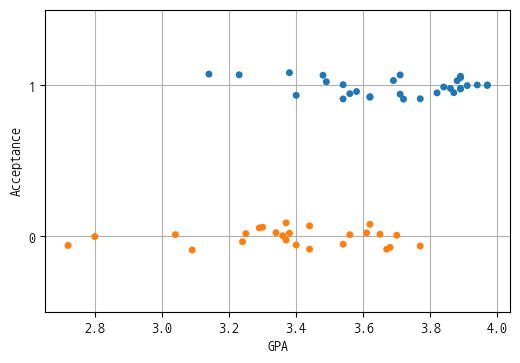

In [113]:
import seaborn as sns
sns.stripplot(x="GPA", y="Acceptance", data=df_med, jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

# 결과분석
# 학점(GPA)는 합격여부에 큰 영향이 없다. 즉, 학점이외의 특성이 합격여부를 결정시킬 수 있다.

In [115]:
# 로지스틱 회귀분석
# MCAT는 총점이기 때문에 독립변수에서 제외
model_med = sm.Logit.from_formula("Acceptance ~ Sex+BCPM+GPA+VR+PS+WS+BS+Apps", df_med)
result_med = model_med.fit()
print(result_med.summary2())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.591     
Dependent Variable: Acceptance       AIC:              48.3194   
Date:               2020-04-21 13:02 BIC:              66.2203   
No. Observations:   54               Log-Likelihood:   -15.160   
Df Model:           8                LL-Null:          -37.096   
Df Residuals:       45               LLR p-value:      6.0143e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  -46.6414   15.5997  -2.9899  0.0028  -77.2162  -16.0666
Sex[T.M]    -2.2835    1.4295  -1.5975  0.1102   -5.0852    0.

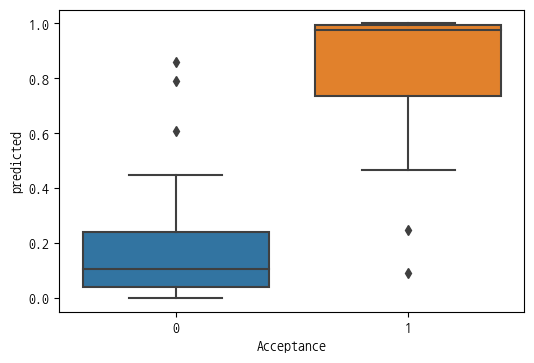

In [118]:
df_med['predicted'] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y='predicted', data=df_med)
plt.show()

### 분류

##### 회귀분석과 분류

예측 문제는 출력하고자 하는 데이터가 숫자 값인가 카테고리값인가에 따라 사용하는 방법이 완전히 달라진다.

출력하고자 하는 값이 숫자인 경우를 회귀분석(regression analysis)이라고 하며, 전통적인 통계분석에서 많이 사용하는 예측 방법이다. 반대로 출력하고자 하는 값이 카테고리값인 경우는 분류(classification)라고 부른다. 머신러닝 방법은 대부분 이러한 분류 문제를 풀기위한 방법이다.

분류 문제는 우리가 푸는 시험문제 중 4지 선다형 객관식 문제와 같은 것으로 생각할 수 있다. 반대로 회귀 분석은 답이 되는 숫자를 직접 써야 하는 단답형 문제라고 할 수 있다.

예를 들어 이미지를 컴퓨터에 입력했을 때 "개"인지 "고양이"인지 판별하는 문제는 사실 내부적으로 분류 문제를 사용한다. 보통 1,000개 혹은 그 이상의 가능한 이미지 카테고리 목록을 준비하고 해당 이미지가 이 카테고리에서 어떤 것에 해당하는지를 찾아내는 1,000지 선다형 객관식 문제와 같은 것이다.

##### 1. 붓꽃데이터

<img src='./images/iris_petal_sepal.png' width="300" height="200">

scikit-learn패키지에서 제공하는 붓꽃(iris) 데이터셋은 붓꽃의 꽃받침(Sepal)의 길이, 넓이와 꽃잎(Petal)의 길이, 넓이의 특성을 이용하여 붓꽃의 세가지 종류(setosa, versicolor, virsinia)중 어디에 속하는지를 분류하는 문제이다.

* 타겟 데이터
 * setosa, versicolor, virginica 의 세가지 붓꽃 종

* 특징 자료
 * 꽃받침 길이(Sepal Length)
 * 꽃받침 폭(Sepal Width)
 * 꽃잎 길이(Petal Length)
 * 꽃잎 폭(Petal Width)
 
* 데이터컬럼
 - caseno 일련번호이다. (1부터 150까지 입력된다.)  
 - Sepal Length 꽃받침의 길이 정보이다.  
 - Sepal Width 꽃받침의 너비 정보이다.  
 - Petal Length 꽃잎의 길이 정보이다.  
 - Petal Width 꽃잎의 너비 정보이다.    
 - Species 꽃의 종류 정보이다.  
       setosa / versicolor / virginica 의 3종류로 구분된다.

In [125]:
from sklearn import datasets
iris = datasets.load_iris() # sklearn의 데이터셋
#print(iris.DESCR)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [132]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
df.head()
df['species'] = sy
df.tail()

np.random.seed(0)

# df.sample(frac=1) : frac은 특정비율로 데이터를 랜덤하게 샘플링 해옴
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,2
1,6.0,2.2,4.0,1.0,1
2,5.5,4.2,1.4,0.2,0
3,7.3,2.9,6.3,1.8,2
4,5.0,3.4,1.5,0.2,0
5,6.3,3.3,6.0,2.5,2
6,5.0,3.5,1.3,0.3,0
7,6.7,3.1,4.7,1.5,1
8,6.8,2.8,4.8,1.4,1
9,6.1,2.8,4.0,1.3,1


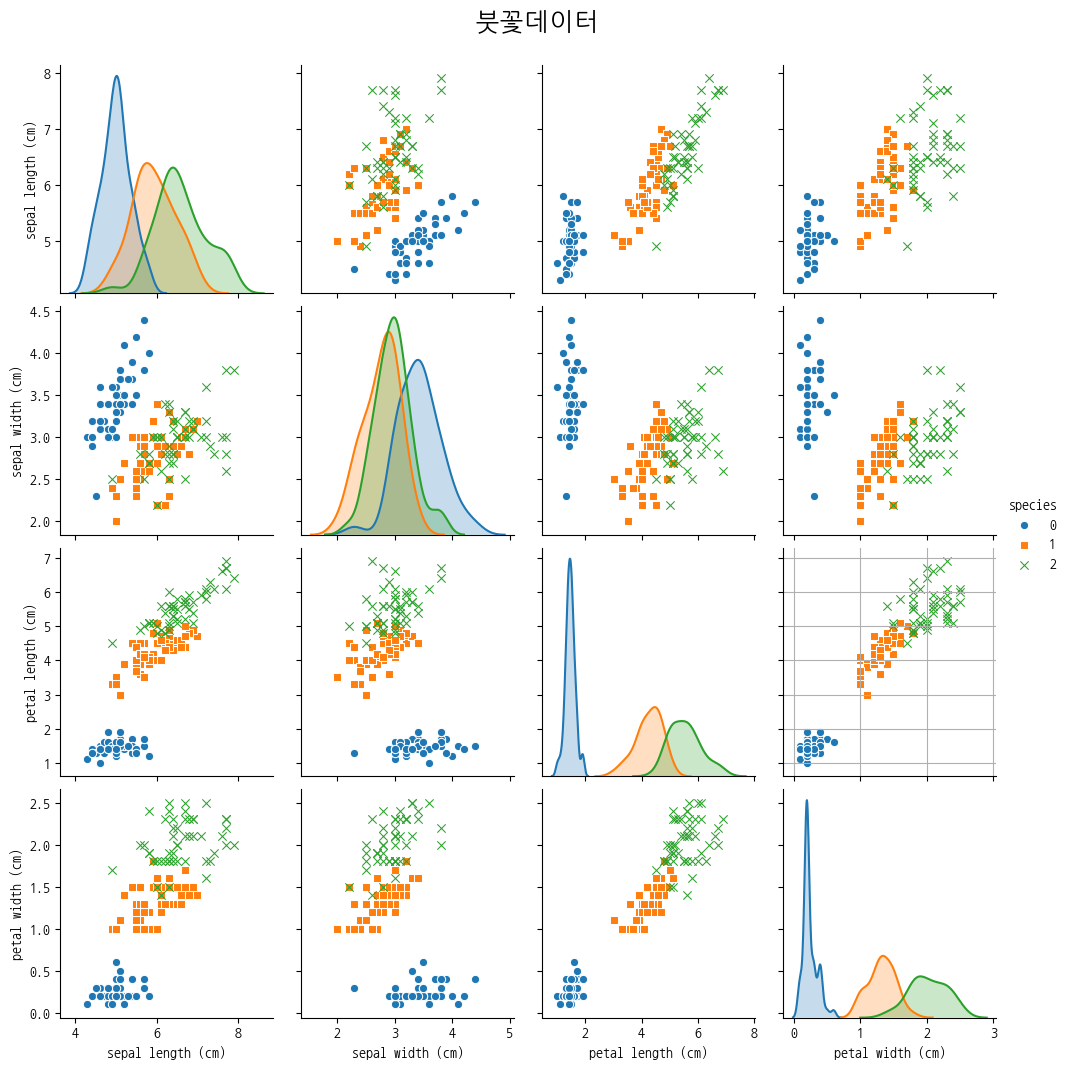

In [137]:
# 붓꽃의 품종과 특성들의 상관관계의 시각화
sns.pairplot(df, hue="species", markers=["o", "s", "x"])
plt.suptitle("붓꽃데이터", y=1.05, fontsize=18)
plt.show()

##### 2. 와인데이터

와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터. load_wine() 명령으로 로드하며 다음과 같이 구성되어 있다.

* 타겟 데이터
 * 와인의 종류 0, 1, 2의 세가지 값

* 특징 자료
 - 알콜(Alcohol)
 - 말산(Malic acid)
 - 회분(Ash)
 - 회분의 알칼리도(Alcalinity of ash)
 - 마그네슘(Magnesium)
 - 총 폴리페놀(Total phenols)
 - 플라보노이드 폴리페놀(Flavanoids)
 - 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
 - 프로안토시아닌(Proanthocyanins)
 - 색상의 강도(Color intensity)
 - 색상(Hue)
 - 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
 - 프롤린(Proline)

In [134]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [142]:
# 실습 : iris데이터와 같은 형태로 sns.pairplot()을 출력!
# 포도주 분류를 즉 컬럼이름을 "class"
# 독립변수 : "alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids", "class"
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype='category')
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


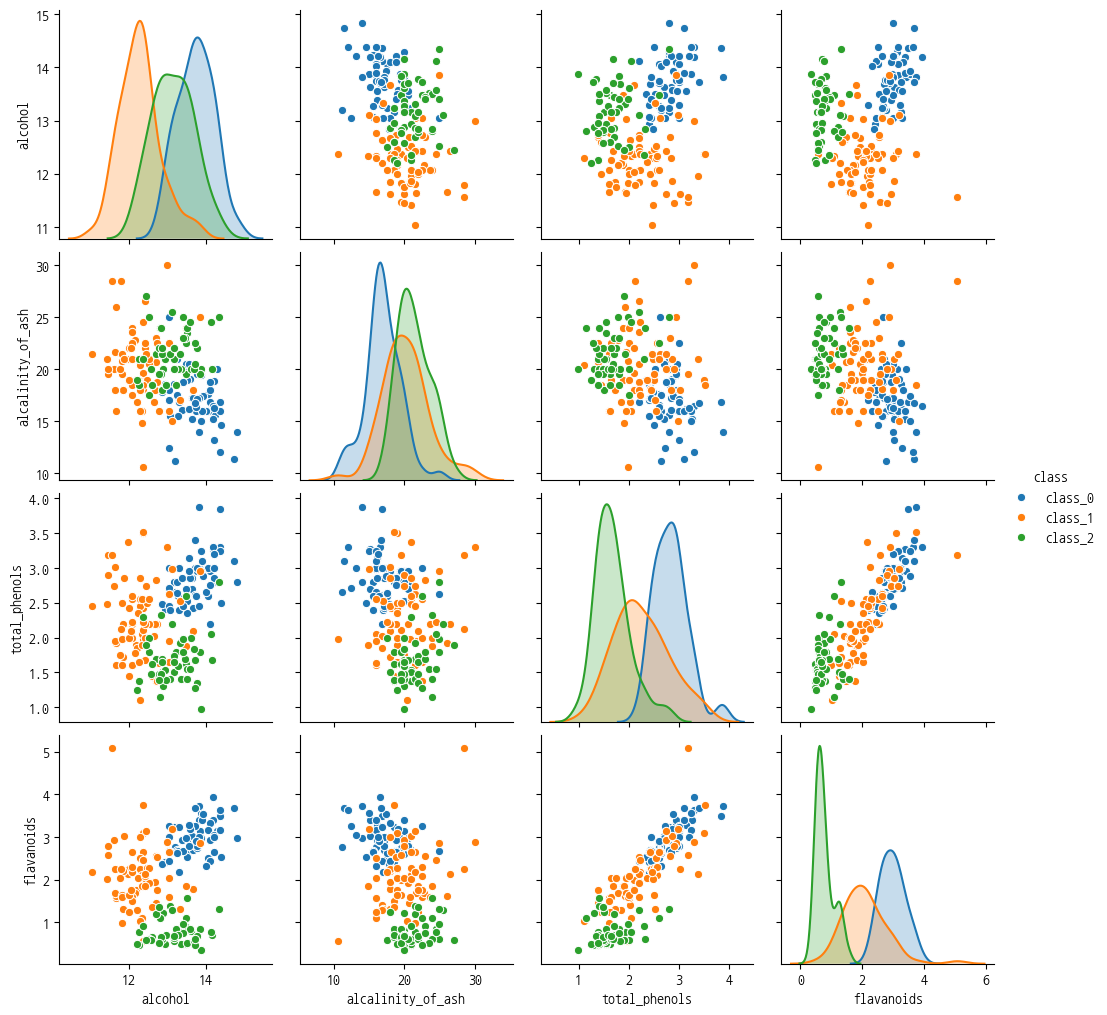

In [143]:
# 와인의 등급과 와인의 13개특성간의 상관관계 시각화
sns.pairplot(df[["alcohol", "alcalinity_of_ash", "total_phenols", 
                 "flavanoids", "class"]], hue="class")
plt.show()

##### 3. 유방암진단 데이터

load_breast_cancer 명령은 유방암(breast cancer) 진단 데이터를 제공한다. 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별한다.

In [144]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [145]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype='category')
sy = sy.cat.rename_categories(cancer.target_names)
df['class'] = sy
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


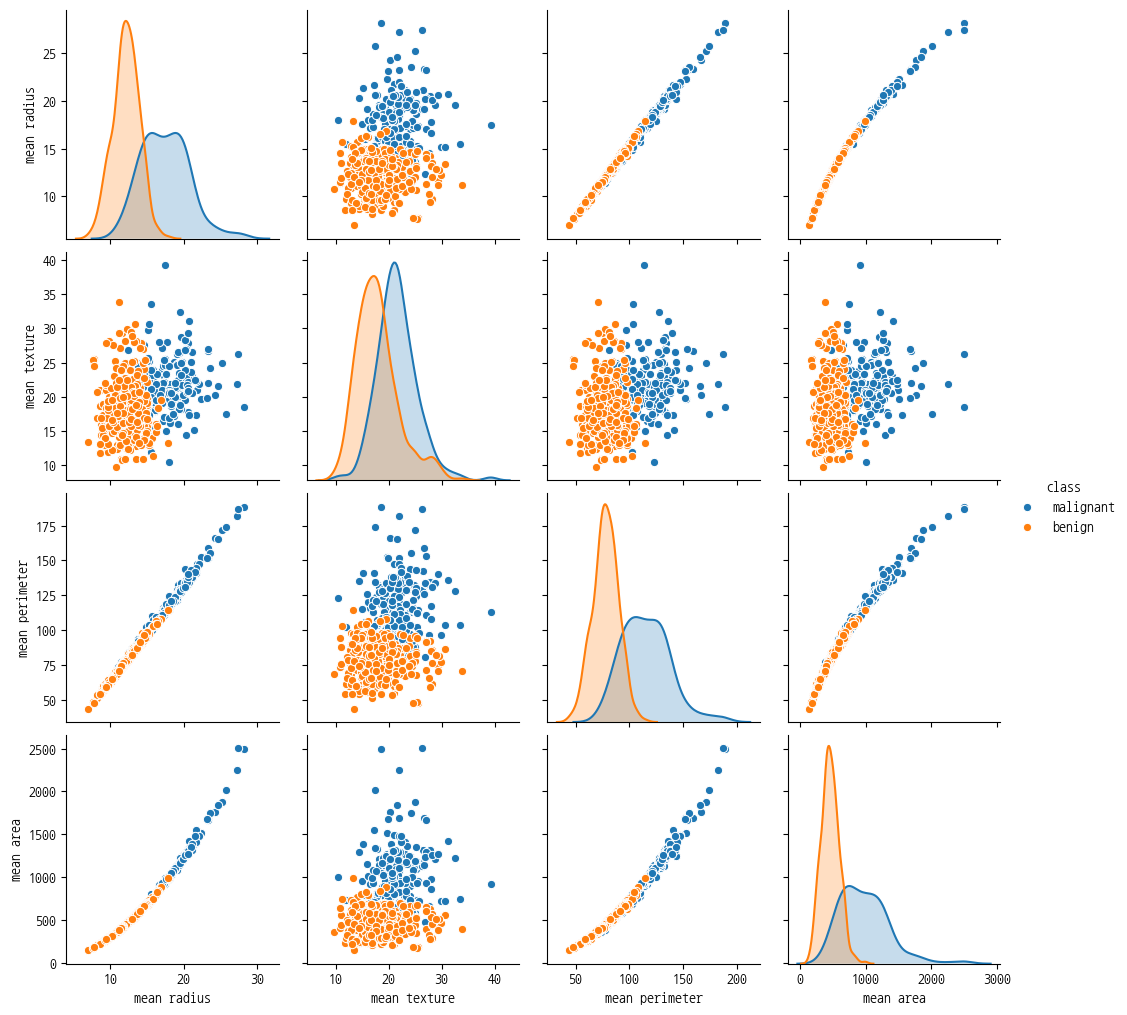

In [146]:
# 유방암의 분류와 유방암의 30개특성간의 상관관계 시각화
sns.pairplot(df[["mean radius", "mean texture", "mean perimeter",
                 "mean area", "class"]], hue="class")
plt.show()

##### 4. 올리베티얼굴사진데이터

AT&T와 캠프리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터 베이스의 간략화된 버전. fetch_olivetti_faces() 명령으로 로드하며 다음과 같이 구성되어 있다. 64x64=4096 해상도의 흑백 이미지이고 40명의 사진 400장으로 구성되어 있다.

* 타겟 데이터
 - 40명의 개인을 나타내는 식별 번호

* 특징 데이터
 - 각 개인의 얼굴 이미지
 
* 참고사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces
* https://scikit-learn.org/stable/datasets/index.html

In [147]:
olivetti = datasets.fetch_olivetti_faces()
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

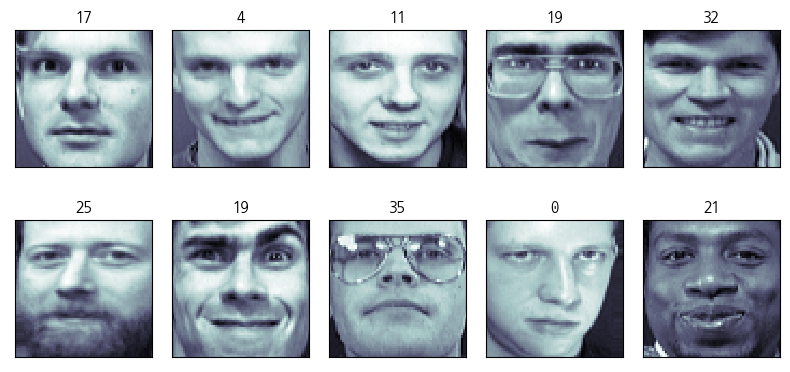

In [151]:
np.random.seed(0)
N = 2
M = 5
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(olivetti.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1) 
        ax.imshow(olivetti.images[k], cmap=plt.cm.bone)
        ax.grid(True)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(olivetti.target[k])

plt.tight_layout()
plt.show()

##### 5. LFW(Labeled Faces in the Wild)데이터

유명 정치인 등의 실제 얼굴에 대한 이미지 데이터. fetch_lfw_people() 명령으로 로드한다. 해상도는 50x37=5,828픽셀이고 각 채널이 0~255의 정수값을 가지는 컬러 이미지이다. 5,749명의 13,233개 사진을 가지고 있다. 다음 인수를 사용하여 로드하는 데이터의 양과 종류를 결정할 수 있다.

* funneled : 디폴트 True
 - 이미지의 위치 조정(funnel) 여부
* resize : 디폴트 0.5
 - 원래 이미지보다 일정 비율로 크기를 줄여서 로드
* min_faces_per_person : 디폴트 None
 - 각 인물당 최소 사진의 수
* color : 디폴트 False
 - True인 경우에는 컬러 사진을, False인 경우에는 흑백 사진을 로드한다.

In [163]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

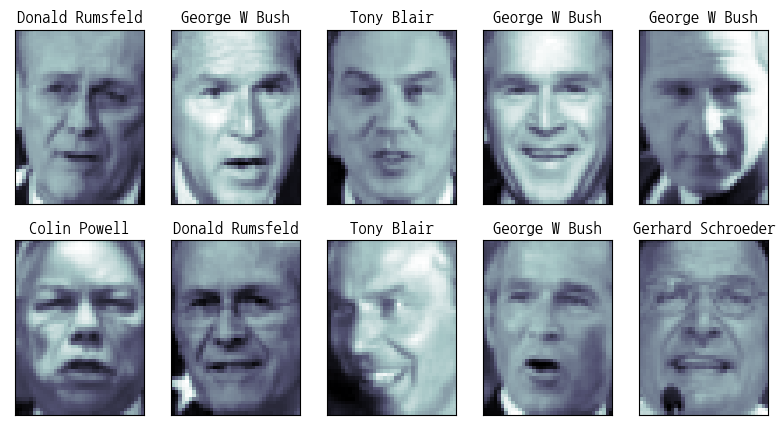

In [164]:
np.random.seed(42)
N = 2
M = 5
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(lfw_people.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1) 
        # ax.imshow(lfw_people.images[k])
        ax.imshow(lfw_people.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(lfw_people.target_names[lfw_people.target[k]])

plt.tight_layout()
plt.show()

In [165]:
# 한쌍의 이미지 데이터를 로드해서 한 쌍의 이미지가 동일인물인지 아닌지여부를 확인할 수 
# 있는 함수 fetch_lfw_pairs()를 이영해서 확인할 수 있다.
lfw_paris = datasets.fetch_lfw_pairs()
print(lfw_paris.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

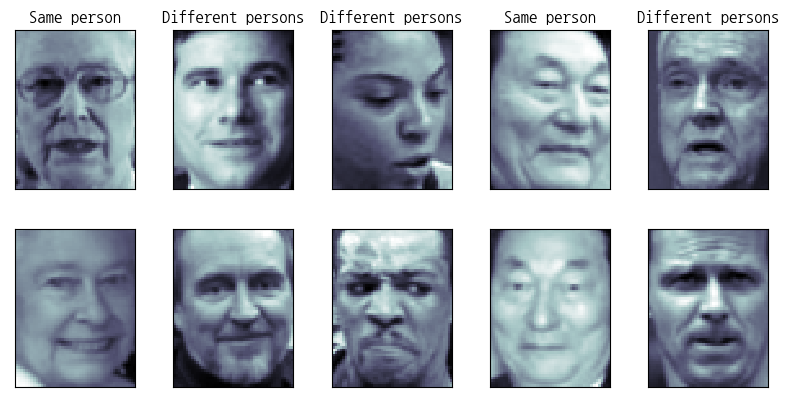

In [169]:
np.random.seed(42)
N = 2
M = 5
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(lfw_paris.data)), M)

for j in range(M):
    k = klist[j]
    ax1 = fig.add_subplot(N, M, j+1) 
    ax1.imshow(lfw_paris.pairs[k][0], cmap=plt.cm.bone)
    ax1.grid(False)
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    plt.title(lfw_paris.target_names[lfw_paris.target[k]])

    ax2 = fig.add_subplot(N,M, j+1+M)
    ax2.imshow(lfw_paris.pairs[k][1], cmap=plt.cm.bone)
    ax2.grid(False)
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticks([])       
        

plt.tight_layout()
plt.show()

##### 6. 숫자필기 이미지 데이터

0부터 9까지의 숫자를 손으로 쓴 이미지 데이터. load_digits() 명령으로 로드한다. 각 이미지는 0부터 15까지의 명암을 가지는 8x8=64픽셀 해상도의 흑백 이미지이다.

In [170]:
# 실습 : load_digits 데이터셋을 이용해서 시각화
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

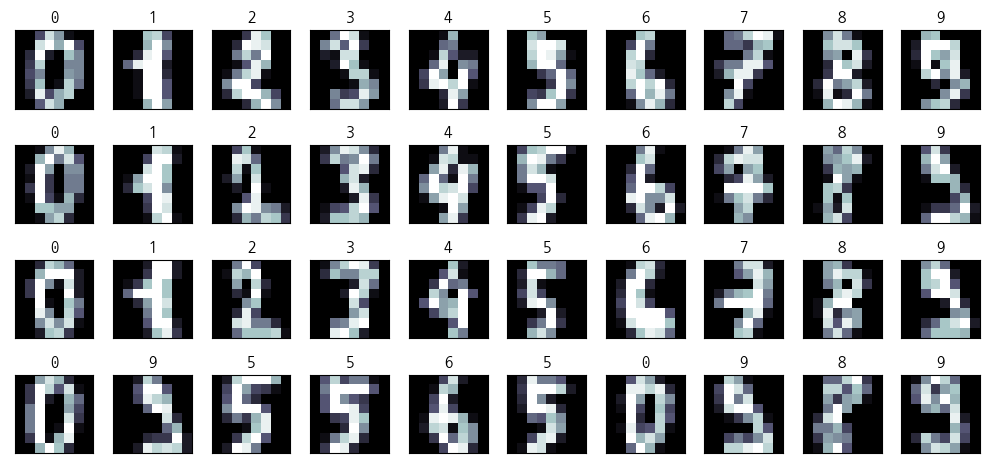

In [171]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [172]:
ax.imshow?